Taller 1 Metodos matematicos

punto 1)

In [46]:
import numpy as np 
import matplotlib.pyplot as plt
def fourier(ts,ys,f):
    N=np.size(ts)
    summ=0
    for i in range(N):
        val=0
        val=ys[i]*np.exp(2*np.pi*1j*ts[i]*f)
        summ+=val
    return summ

punto 2)

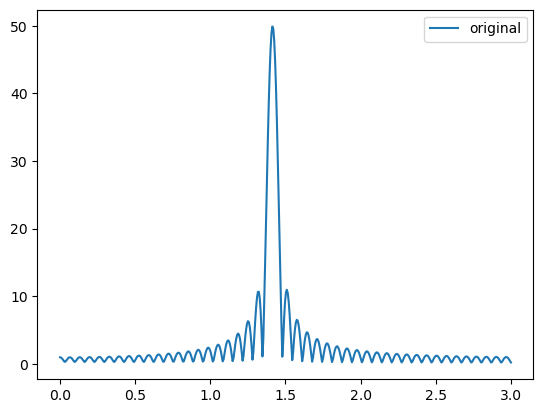

In [47]:
t=np.linspace(0,15,100)
y=np.sin(2*np.pi*np.sqrt(2)*t)

f=np.linspace(0,3,500)

def transformada_ft(ts, ys,f_array):
    N=len(f_array)
    vl=np.zeros(N)

    for i in range(N):
        vl[i]=abs(fourier(ts, ys, f_array[i]))
        
    return vl
    
def grafica_transformada(ts, ys,f_array,nombre:str):
    
    vl=transformada_ft(ts,ys,f_array)  
    plt.plot(f_array, vl,label=nombre)
    plt.legend()
    


grafica_transformada(t,y,f,"original")
plt.show()

Ahora para resolver el siguiente punto, reviaremos que sucede si le agregamos ruido a la señal 

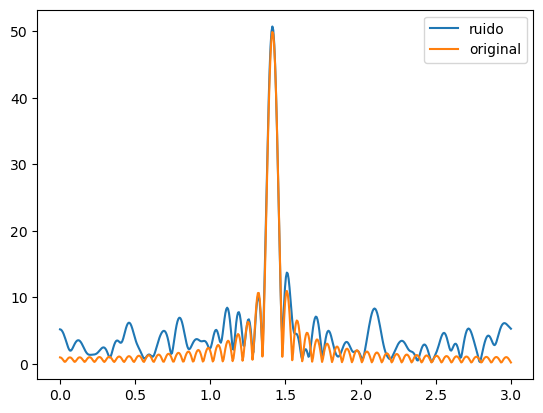

In [48]:
ruido = np.random.normal(0, 0.33, len(y))
y_rand = y + ruido

grafica_transformada(t,y_rand,f,"ruido")
grafica_transformada(t,y,f,"original")
plt.show()



Por lo tanto, podemos evidenciar que añadir ruido, este aumentara la magnitud de de las transformadas de las otras frecuencias, sin embargo, la frecuencia correcta sigue siendo identificable.

Punto 3)

Para encontrar el pico maximo y el ancho de media altura se hara lo siguiente 


In [51]:
Fvalores=transformada_ft(t,y,f)

ind_max=np.argmax(Fvalores)

fmax=f[ind_max]
Imax=Fvalores[ind_max]

print("la frecuancia en al que se encuentra el pico es",fmax,"Hz")

Imedio=np.argmin(abs(Fvalores-(Imax/2)))
FWHM=2*abs(f[Imedio]-fmax)
print("y el ancho a media altura FWHM es",FWHM,"Hz")


la frecuancia en al que se encuentra el pico es 1.4128256513026052 Hz
y el ancho a media altura FWHM es 0.08416833667334656 Hz
